In [5]:
import tensorflow as tf
import keras

In [6]:
tf.__version__

'2.8.0'

In [7]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras import models,layers
# from keras.utils import to_categorical
from keras import optimizers

In [8]:
# loading the dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [9]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [10]:
labels=['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
#explore data
print(ytrain[8800])

[2]


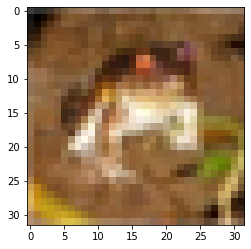

In [12]:
plt.imshow(xtrain[0])
plt.show()

In [13]:
type(xtrain)

numpy.ndarray

In [14]:
xtrain.dtype  # datatype of the numbers contained in this numpy array !!

dtype('uint8')

In [15]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [17]:
a.astype('int8')

array([1, 2, 3], dtype=int8)

In [18]:
b = a*np.pi

In [19]:
b

array([3.14159265, 6.28318531, 9.42477796])

In [20]:
b.astype('int8')

array([3, 6, 9], dtype=int8)

In [21]:
# We are loosing precision (while computations) by keeping the data in a "lower"-bit (and too as a integer)

In [22]:
np.random.rand(5)   # one plane (line or series) of random numbers

array([0.24424837, 0.23501799, 0.69832745, 0.97813783, 0.86115915])

In [23]:
np.random.rand(3,4)  # one plane 2D of random numbers  (3 rows & 4 col of random nos)

array([[0.26538939, 0.32492079, 0.18944626, 0.6704252 ],
       [0.56330736, 0.2738231 , 0.81707596, 0.2390418 ],
       [0.08173101, 0.8238305 , 0.40326202, 0.11920956]])

In [24]:
np.random.rand(3,4,5)   # we get 3 planes, each plane has 4 rows & 5 columns !!!

array([[[0.94548214, 0.21497705, 0.12288746, 0.6368427 , 0.10510839],
        [0.38477149, 0.8680338 , 0.86869487, 0.29645632, 0.22545761],
        [0.0812937 , 0.9333522 , 0.8747355 , 0.12980677, 0.51315342],
        [0.75684774, 0.04944157, 0.63227781, 0.96627442, 0.73089619]],

       [[0.30977859, 0.66202884, 0.2038809 , 0.70531322, 0.1912614 ],
        [0.12754195, 0.92332598, 0.84400416, 0.975009  , 0.93010567],
        [0.31755063, 0.2602213 , 0.16852438, 0.7312286 , 0.17962377],
        [0.16255732, 0.50664451, 0.35155721, 0.51011757, 0.6874571 ]],

       [[0.78504834, 0.73112047, 0.61668664, 0.9369812 , 0.7386175 ],
        [0.59784217, 0.3282497 , 0.57315082, 0.232093  , 0.05264249],
        [0.34971548, 0.6104219 , 0.41490524, 0.11325164, 0.19294446],
        [0.16106982, 0.08535226, 0.23457671, 0.67720872, 0.64224946]]])

In [25]:
# convert the pixel values in float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [26]:
0.3 - 0.2 - 0.1  # this is purely an artifact of loss of precision during floating-point calculation

-2.7755575615628914e-17

In [1]:
np.finfo(float).eps   # Any number smaller than eps is practically ZERO

NameError: name 'np' is not defined

In [27]:
# scale the images
xtrain /= 255  # ths is eqvalent to xtrain = xtrain/255 
xtest /= 255

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
ytrain[0]   # label for the 1st image

array([6], dtype=uint8)

In [30]:
#Convert the class vectors into binary class matrices
# basically One Hot Encoding of the labels (ytrain & ytest)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [31]:
ytrain[0]   # label for the 1st image  (for 1 images, its 1x10)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [32]:
ytrain.shape

(50000, 10)

In [33]:
ytest.shape

(10000, 10)

In [34]:
xtrain[0]  # effect of scaling .. all the pixel values are in the range of 0-1 !!!

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [35]:
# 0.2989 * R  +  0.5870 * G  +  0.1140 * B 

Red_plane = xtrain[0,:,:,0]  # 1st image, then all rows, all cols, 1st plane
Green_plane = xtrain[0,:,:,1]
Blue_plane = xtrain[0,:,:,2]

In [36]:
Red_plane.shape

(32, 32)

In [37]:
grayscale_img = 0.2989 *Red_plane  +  0.5870 *Green_plane  +  0.1140 *Blue_plane

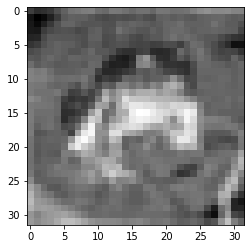

In [38]:
# grayscale_img = grayscale_img*255
# grayscale_img.astype('uint8')
plt.imshow(grayscale_img, cmap='gray')
plt.show()

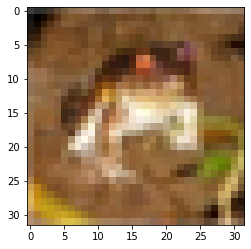

In [39]:
plt.imshow(xtrain[0])
plt.show()

In [40]:
32*32*3

3072

In [41]:
# MNIST dataset 28x28 = 782 pixels for each image
# We had reshaped each image into a row vector (i.e. single row with 784 columns)
# So each col represents a feature
# So essentially, our dataset had 784 features agianst every MNIST image


# For CIFAR-10 >>> 32,32,3 
# We'll have 3072 pixels values (features) against every image!!!

In [43]:
model = models.Sequential()  # create an empty model

model.add(layers.Flatten(input_shape = (32,32,3))) # reshapes into 1D vector (1,3072)

model.add(layers.Dense(64, activation='relu'))  # 1st hidden layer
model.add(layers.Dense(32, activation='relu'))  # 2nd hidden layer

model.add(layers.Dense(10, activation='softmax'))  # output layer

In [44]:
model.summary()  # the i/p has 3072 nodes

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [45]:
3072*64 + 64

196672

In [46]:
64*32 + 32

2080

In [47]:
# Let's compile the model
model.compile(loss = 'categorical-crossentropy', optimizer='adam', metrics='accuracy')

In [1]:
history = model.fit(xtrain, ytrain, validation_split=0.2, verbose=True, epochs=50, batch_size=1000)

NameError: name 'model' is not defined